# Sequence of my code is as follow:
## A) Reading Data
## B) Preprocessing:
   #### 1) Check correlation between features and output
   #### 2) Choosing the top correlated features
   #### 3) Handling missing data
   #### 4) Outliers
   #### 5) Data normalization
## C) Choosing regression technique

# importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib  inline

# reading data

In [2]:
houses_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
houses_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houses_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Correlation check and choosing the most correlated features


<AxesSubplot:>

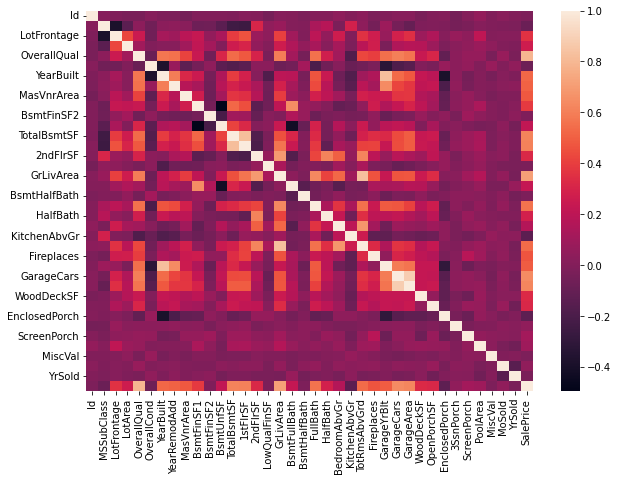

In [4]:
corr = houses_data.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr)

<AxesSubplot:>

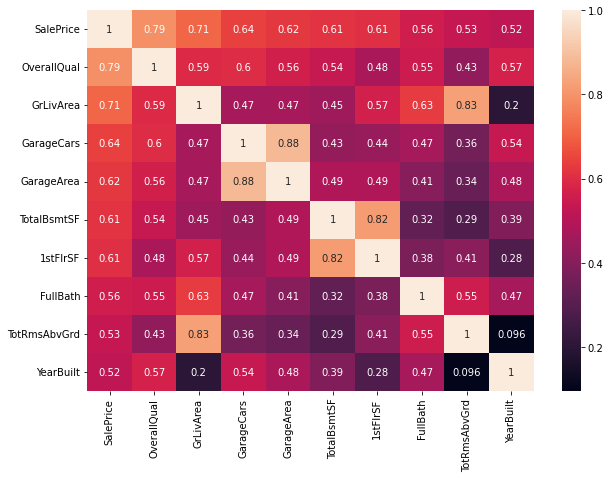

In [5]:
"""Correlation coefficient values below 0.3 are considered to be weak; 0.3-0.7 are moderate; >0.7 are strong"""
#cols of features that most correlated to SalePrice
cols = corr.nlargest(10,"SalePrice")["SalePrice"].index
#additional step
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(houses_data[cols].corr(),annot = True)

# Missing Data

In [6]:
houses_data = houses_data.drop(["Id"],axis = 1) #drop id since it just counter
isnull_df = pd.DataFrame(houses_data.isna().sum().sort_values(ascending = False),columns = ["null_sum"])
isnull_df.head(20)

,null_sum
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [7]:
#I will drop any columns has nulls
drop_cols_nul = isnull_df.index[isnull_df["null_sum"].values > 1]
houses_data.drop(drop_cols_nul,axis = 1,inplace = True)

In [8]:
houses_data.dropna(inplace = True)

In [9]:
for i in cols.values:
    if i  not in houses_data.columns.values:
        print("problem")
houses_data.isna().sum().values.sum()


0

# Outliers

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SalePrice'>

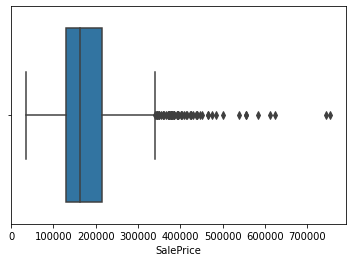

In [10]:
sns.boxplot(houses_data["SalePrice"])

In [11]:
up_lst  = []
low_lst = []
for i in cols:
    print(i)
    Q1 = np.percentile(houses_data[i], 25,interpolation = 'midpoint')
    Q3 = np.percentile(houses_data[i], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(houses_data[i] >= (Q3+1.5*IQR))
    print("upper",upper)
    # Lower bound
    lower = np.where(houses_data[i] <= (Q1-1.5*IQR))
    print("lower = ",lower)
    ''' Removing the Outliers '''
    for j in range(len(upper[0])):
        if not (upper[0][j] in up_lst):
            up_lst.append(upper[0][j])
    for k in range(len( lower[0])):
        if not (lower[0][k] in low_lst):
            low_lst.append(lower[0][k])


SalePrice
upper (array([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
        309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
        481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
        664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
        877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
       1267, 1268, 1353, 1373, 1387, 1436]),)
lower =  (array([], dtype=int64),)
OverallQual
upper (array([  58,  185,  224,  389,  440,  515,  523,  583,  591,  691,  825,
        994, 1169, 1182, 1243, 1298, 1373, 1441]),)
lower =  (array([ 375,  533,  636,  916, 1100]),)
GrLivArea
upper (array([  58,  118,  185,  197,  231,  304,  324,  496,  523,  583,  608,
        635,  691,  769,  798,  803,  961, 1024, 1031, 1046, 1142, 1169,
       1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1385]),)
lower =  (array([], dtype=int64),)
GarageCars
upper (array([ 420,  747, 1190, 1340, 1350]),)
lower =  (array([], dty

In [12]:
up_arr = np.array(up_lst)
low_arr = np.array(low_lst)
print("up arr {}".format(up_arr.shape))
print("low arr {}".format(low_arr.shape))
out_lier_rows = np.append(low_arr,up_arr)
print("out_lier_rows {}".format(out_lier_rows.shape))
out_lier_rows = np.unique(out_lier_rows)

up arr (144,)
low arr (50,)
out_lier_rows (194,)


In [13]:
out_lier_rows.shape

(189,)

In [14]:
out_lier_rows = list(out_lier_rows)
training_data = houses_data[cols]
training_data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000


In [15]:
train_data = training_data.drop(out_lier_rows,axis = 0)

train_data.shape

(1270, 10)

In [16]:
train_data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SalePrice'>

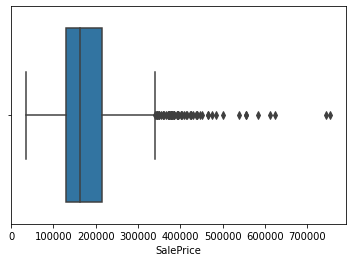

In [17]:
sns.boxplot(houses_data["SalePrice"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SalePrice'>

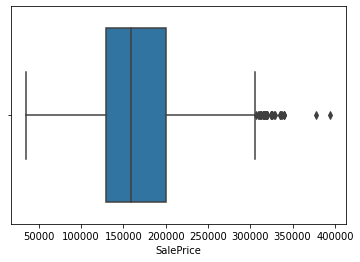

In [18]:
sns.boxplot(train_data["SalePrice"])

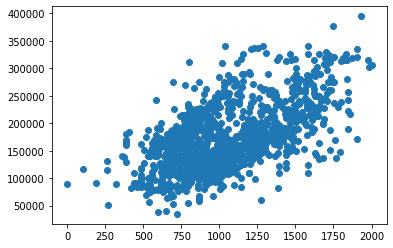

In [19]:
# without outlier
plt.scatter( train_data["TotalBsmtSF"], train_data["SalePrice"])

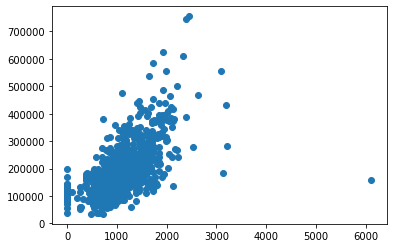

In [20]:
# with outlier
plt.scatter( houses_data["TotalBsmtSF"], houses_data["SalePrice"])

# Data Normalization

In [21]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(train_data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=train_data.columns)
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,0.676466,0.823375,0.703933,0.427362,0.492825,-0.541891,-0.793533,0.927907,1.356843,1.087012
1,0.204406,-0.006535,-0.407970,0.427362,0.032679,0.698112,0.483987,0.927907,-0.183095,0.153981
2,0.938721,0.823375,0.892560,0.427362,0.806562,-0.346422,-0.592151,0.927907,-0.183095,1.017898
3,-0.521166,0.823375,0.721307,1.874694,0.984345,-0.847310,-0.463140,-0.978957,0.586874,-1.953977
4,1.402038,1.653284,1.915114,1.874694,1.998759,0.340771,0.115835,0.927907,2.126812,0.983342


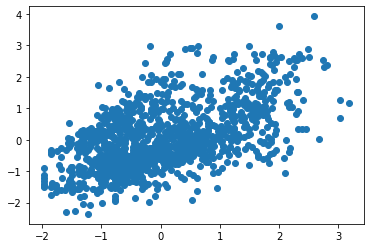

In [22]:
plt.scatter( df_scaled["1stFlrSF"], df_scaled["SalePrice"])

## Models for Regression

### 1)Linear Regression

In [23]:
X = df_scaled.drop(["SalePrice"],axis=1)
y = df_scaled["SalePrice"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
print(f"Train shape is {X_train.shape} Test_shape {X_test.shape}")
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_lr_pred = lr_model.predict(X_test)

Train shape is (952, 9) Test_shape (318, 9)


In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MSE =  mean_squared_error(y_test , y_lr_pred)
print("MSE of LinearRegression = ",MSE)
MAE = mean_absolute_error(y_test , y_lr_pred)
print("MAE of LinearRegression = " , MAE)
r2 = r2_score(y_test , y_lr_pred )
print("r2_score of LinearRegression = " , r2)

MSE of LinearRegression =  0.20497573798713295
MAE of LinearRegression =  0.33739405727753985
r2_score of LinearRegression =  0.7990837030911846


### 2)lasso Regresssor

In [25]:
from sklearn.linear_model import Ridge,  Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train,y_train)
lasso_y_pred = lasso_model.predict(X_test)

MSE =  mean_squared_error(y_test , lasso_y_pred)
print("MSE of lassoRegression = ",MSE)
MAE = mean_absolute_error(y_test , lasso_y_pred)
print("MAE of lassoRegression = " , MAE)
r2 = r2_score(y_test , lasso_y_pred )
print("r2_score of lassoRegression = " , r2)

MSE of lassoRegression =  0.21009275394488156
MAE of lassoRegression =  0.3388432276838743
r2_score of lassoRegression =  0.7940680270528884


### 3)Ridge Regressor

In [26]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train,y_train)
ridge_y_pred = ridge_model.predict(X_test)

MSE =  mean_squared_error(y_test , ridge_y_pred)
print("MSE of RidgeRegression = ",MSE)
MAE = mean_absolute_error(y_test , ridge_y_pred)
print("MAE of RidgeRegression = " , MAE)
r2 = r2_score(y_test , ridge_y_pred )
print("r2_score of lassoRegression = " , r2)

MSE of RidgeRegression =  0.2049768368785509
MAE of RidgeRegression =  0.33739424165051185
r2_score of lassoRegression =  0.7990826259627568


### 3)XGBoost

In [27]:
import xgboost as xg
 

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
xgb_y_pred = xgb_r.predict(X_test)
 
MSE =  mean_squared_error(y_test , xgb_y_pred)
print("MSE of XGBRegressor = ",MSE)
MAE = mean_absolute_error(y_test , xgb_y_pred)
print("MAE of XGBRegressor = " , MAE)
r2 = r2_score(y_test , xgb_y_pred )
print("r2_score of XGBRegressor = " , r2)

[15:30:53] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
MSE of XGBRegressor =  0.20799427899780726
MAE of XGBRegressor =  0.3279721383875845
r2_score of XGBRegressor =  0.7961249427623396
